<a href="https://colab.research.google.com/github/ImmortalizedInHearts/NeuralNetwork/blob/main/NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

from tqdm import tqdm

In [73]:
mat = scipy.io.loadmat('data.mat')
trainInputs = np.array(mat['data']['test'][0][0][0][0][0])
trainTargets = np.array(mat['data']['test'][0][0][0][0][1])

testInputs = np.array(mat['data']['training'][0][0][0][0][0])
testTargets = np.array(mat['data']['training'][0][0][0][0][1])

validationInputs = np.array(mat['data']['validation'][0][0][0][0][1])
validationTargets = np.array(mat['data']['validation'][0][0][0][0][0])

In [101]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))
  
def derivSigmoid(x):
  return x * (1 - x)

def crossEntropyLoss(y_true, y_pred, k):
  loss = y_true[y_true == 1] @ np.log(y_pred[y_true == 1])
  return -1 * loss / len(y_true.T) + network.l1 * np.abs(k).mean()

def targetsSearch(data):
  predict = network.feedforward(data).T
  return np.array([np.argmax(x) for x in predict])

In [126]:
class NeuralNetwork:
  def __init__(self, k):
    # weights
    self.k = k

    # bias
    self.b1 = 0
    self.b2 = 0

    # regularization parameter
    self.l1 = 0.1

    # loss
    self.loss = list()

    # prediction
    self.ypreds = list()
    
  def feedforward(self, data):
    h1 = sigmoid(self.k @ data) #+bias
    return h1

  def train(self, data, y_true):
        learn_rate = 0.0000005
        epochs = 5000
 
        for epoch in tqdm(range(epochs)):
            # backprop
            y_pred = self.feedforward(data)

            dL_dk = (-1 * y_true) * (1 - y_pred) # NOT AT ALL (must be y_true/y_pred) 

            """ Weights and bias updating """
            # Neuron h1
            self.k -= learn_rate * (dL_dk @ data.T + self.l1 * np.sign(self.k))

            """ Loss calculation """
            self.loss.append(crossEntropyLoss(y_true, y_pred, self.k))

In [127]:
kParameters = np.zeros((10,256))
confMatrixTest = [[0 for x in range(10)] for i in range(10)]
confMatrixValidation = [[0 for x in range(10)] for i in range(10)]
network = NeuralNetwork(kParameters)
network.train(trainInputs, trainTargets)

100%|██████████| 5000/5000 [01:25<00:00, 58.47it/s]


In [128]:
testPredictions = targetsSearch(testInputs)
validationPredictions = targetsSearch(validationInputs)

for index in range(len(validationPredictions)):
  confMatrixTest[np.argmax(testTargets.T[index])][testPredictions[index]] += 1
  confMatrixValidation[np.argmax(validationTargets.T[index])][validationPredictions[index]] += 1

In [129]:
print(np.mean([confMatrixTest[i][i] for i in range(10)]))
confMatrixTest

80.0


[[70, 1, 4, 0, 2, 12, 6, 1, 4, 0],
 [0, 79, 6, 1, 9, 2, 0, 1, 2, 0],
 [0, 0, 87, 2, 1, 2, 3, 3, 2, 0],
 [0, 1, 3, 81, 0, 9, 0, 2, 3, 1],
 [0, 4, 1, 0, 90, 0, 2, 1, 0, 2],
 [0, 1, 0, 8, 2, 88, 0, 0, 1, 0],
 [0, 3, 3, 0, 3, 3, 86, 0, 2, 0],
 [0, 10, 0, 0, 0, 0, 0, 89, 1, 0],
 [0, 5, 1, 5, 5, 9, 0, 4, 67, 4],
 [0, 9, 1, 0, 15, 0, 0, 12, 0, 63]]

In [130]:
print(np.mean([confMatrixValidation[i][i] for i in range(10)]))
confMatrixValidation

79.6


[[69, 0, 3, 0, 2, 16, 8, 0, 2, 0],
 [0, 74, 8, 2, 10, 3, 0, 0, 3, 0],
 [0, 0, 79, 5, 3, 2, 3, 5, 3, 0],
 [0, 0, 2, 82, 1, 11, 0, 2, 2, 0],
 [0, 6, 0, 0, 93, 0, 1, 0, 0, 0],
 [0, 1, 1, 9, 0, 85, 0, 2, 1, 1],
 [0, 3, 4, 0, 4, 2, 84, 0, 3, 0],
 [0, 5, 0, 0, 1, 0, 0, 93, 0, 1],
 [0, 0, 2, 5, 9, 4, 0, 2, 74, 4],
 [0, 4, 0, 1, 18, 0, 0, 13, 1, 63]]

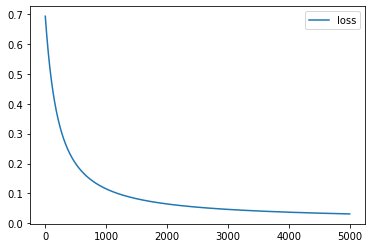

In [131]:
plt.plot(network.loss, label='loss')
plt.legend()